In [2]:
#loading and showing Database
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


berkshire3_df = pd.read_excel('Berkshire3.xlsx')
berkshire4_df = pd.read_excel('Berkshire4.xlsx')
berkshire3_df.head()
berkshire4_df.head()

,Status,Nmbr Cs,Id Prsn Dfndnt,Offense Dt,Court Code,Chrg Cnt,Chrg Code,Chrg Desc,Case Type,Crime Type,...,Min Actl Jail Imp Term Unt,Max Actl Jail Imp Term,Max Actl Jail Imp Unt,Code Fclty,Min Imp Cmnty Srvc Term,Min Imp Cmnty Srvc Unt,Max Imp Cmnty Srvc,Max Imp Cmnty Srvc Unt,Text Cmnt,Desc Ofcr Agncy
0,Closed,19-05-103518,24840,1992-02-29 00:00:00,CBDC,1,266/37/B,LARCENY BY CHECK UNDER $250 c266 §37 & §30(1),Larceny,Larceny By Check,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,Private Complaint
1,Closed,19-05-103519,24840,1992-02-01 00:00:00,CBDC,1,266/37/B,LARCENY BY CHECK UNDER $250 c266 §37 & §30(1),Larceny,Larceny By Check,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,Private Complaint
2,Closed,19-08-104806,24840,2019-07-09 00:00:00,GBDC,1,90/10/A,UNLICENSED OPERATION OF MV c90 §10,Motor Vehicle,Unlicensed,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Lee
3,Closed,19-08-104806,24840,2019-07-09 00:00:00,GBDC,2,90/7/D,"EQUIPMENT VIOLATION, MISCELLANEOUS MV * c90 §7",Motor Vehicle,Unlicensed,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Lee
4,Closed,19-04-103189,24867,2019-04-06 00:00:00,NADC,1,94C/34/D,"DRUG, POSSESS CLASS B, SUBSQ.OFF. c94C §34",Narcotics,Possession of Narcotics,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,North Adams Police Department


In [3]:
#Correlation between the two datasets
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

berkshire3_df = pd.read_excel('Berkshire3.xlsx')
berkshire4_df = pd.read_excel('Berkshire4.xlsx')
berkshire_total = pd.concat([berkshire3_df, berkshire4_df])

df = berkshire_total[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]
df2 = df[['Race', 'Gender','Case Type','Crime Type' ,'Disp Type', 'Disp Desc', 'Sentence Translation']]
corr = df2.corr()
corr
corr.style.background_gradient(cmap='coolwarm')




/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/3859793279.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/402763250.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/402763250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentence Translation'] = df['Sentence Translation'].replace(["Filed", 'Filed w/o Change of Plea'], 'Filed')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/402763250.py:12:

W        52757
B         8968
Other     1808
H         1727
A          196
Name: Race, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

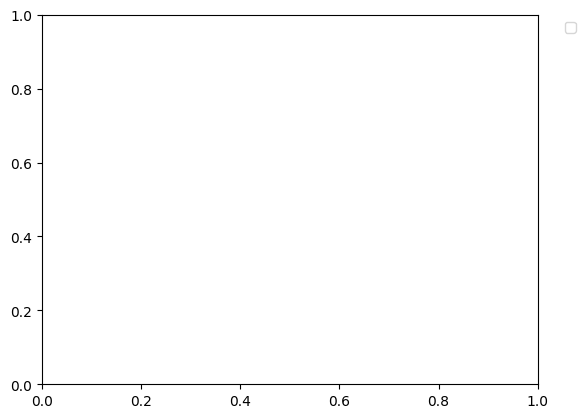

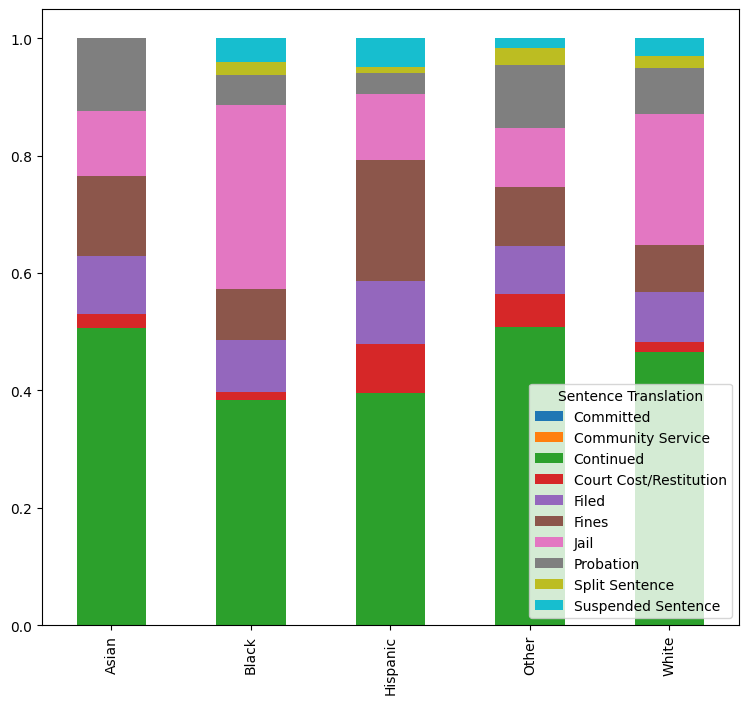

In [85]:
#Sentence Translations by Race
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

df = berkshire3_df[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]

df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
print(df["Race"].value_counts())
df['Sentence Translation'] = df['Sentence Translation'].replace(["Filed", 'Filed w/o Change of Plea'], 'Filed')
df['Sentence Translation'] = df['Sentence Translation'].replace(["Jail", 'Jail (Time Served)'], 'Jail')
df['Sentence Translation'] = df['Sentence Translation'].replace(['Continued w/o Change of Plea','Continued w/o Finding'], 'Continued')
grouped = df.groupby(['Race','Sentence Translation']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0)


grouped.index = ['Asian', 'Black', 'Hispanic', 'Other', 'White']
grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/3233402436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Race'] = new_df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')


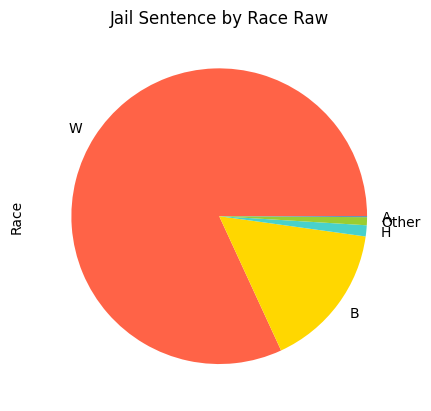

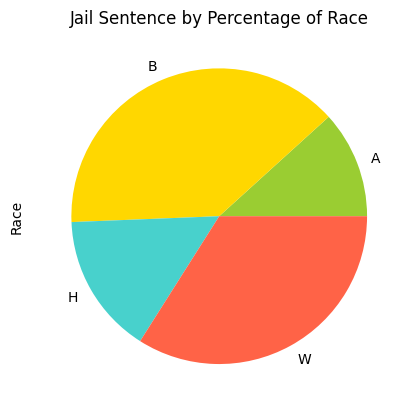

In [5]:
#Jail sentence by percentage of people and raw number in race
df = berkshire3_df[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]

df['Race'].value_counts()
new_df = df.loc[df['Sentence Translation'] == 'Jail']
new_df['Race'] = new_df['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
new_df.head()
new_df['Race'].value_counts()

colors = ['tomato', 'gold', 'mediumturquoise', 'yellowgreen','steelblue' ,'mediumpurple']
(new_df['Race'].value_counts()).plot.pie(y='Race', title="Jail Sentence by Race Raw", colors = colors) 
plt.show()
temp_df = (new_df['Race'].value_counts()/df['Race'].value_counts())

(temp_df).plot.pie(y='Race', title="Jail Sentence by Percentage of Race", colors = ['yellowgreen','gold','tomato','steelblue','mediumturquoise','mediumpurple'])
plt.show() 

/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/3660308921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C', 'M', 'BR', 'A', 'H'], 'Other')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/3660308921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disp Desc'] = df['Disp Desc'].replace(['Dismissed - Show Cause', 'Dismissed - Transfered to Sup Ct', 'Dismissed Without Prejudice COVID19','Dismissed/Indicted/Arraigne

W        52757
B         8968
Other     3731
Name: Race, dtype: int64


<AxesSubplot: >

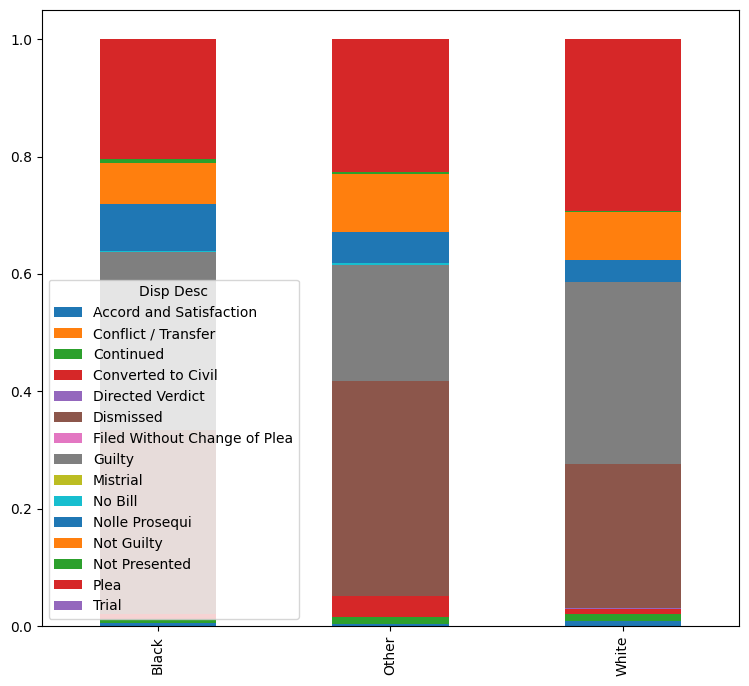

In [84]:
#disposition Description by Race, only Black, White and Other

df['Race'] = df['Race'].replace(['U', 'I', 'EI', 'C', 'M', 'BR', 'A', 'H'], 'Other')
df['Disp Desc'] = df['Disp Desc'].replace(['Dismissed - Show Cause', 'Dismissed - Transfered to Sup Ct', 'Dismissed Without Prejudice COVID19','Dismissed/Indicted/Arraigned' ], 'Dismissed')
df['Disp Desc'] = df['Disp Desc'].replace(['Not Guilty Insanity', 'Not Responsible', 'Required Finding of Not Guilty'], 'Not Guilty')
df['Disp Desc'] = df['Disp Desc'].replace(['Continued Without Change of Plea', 'Continued Without Finding'], 'Continued')
df['Disp Desc'] = df['Disp Desc'].replace(['Admitted Facts Sufficient for a Finding of Guilty', 'Responsible'], 'Guilty')
print(df['Race'].value_counts())
grouped = df.groupby(['Race','Disp Desc']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0)
grouped.index = ['Black', 'Other', 'White']
# colors1 = ['tomato', 'gold', 'steelblue','mediumturquoise','yellowgreen','mediumpurple', 'darkorange']
grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))

/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/15713179.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dismissed['Race'] =  dismissed['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/15713179.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guilty['Race'] = guilty['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_54179/15713179.py:13: SettingWithCopyWarning: 
A 

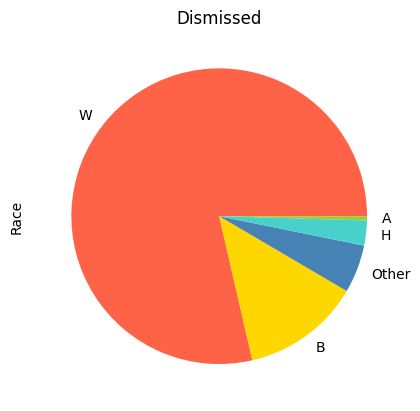

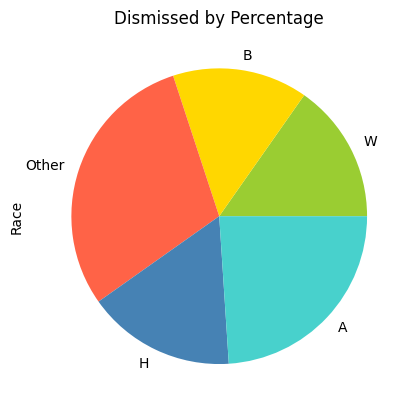

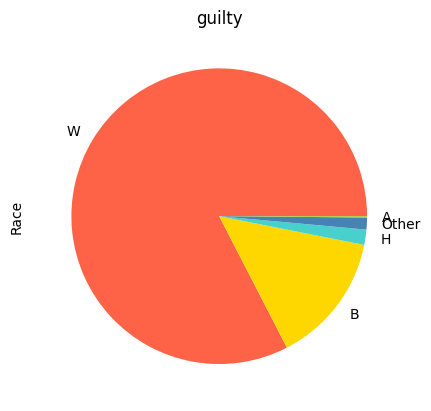

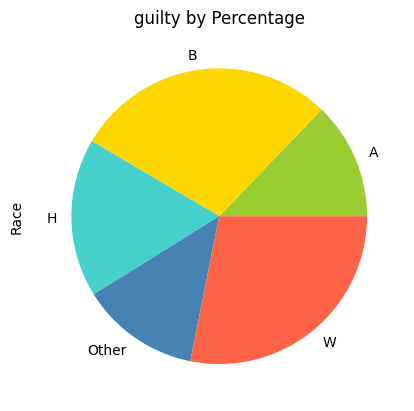

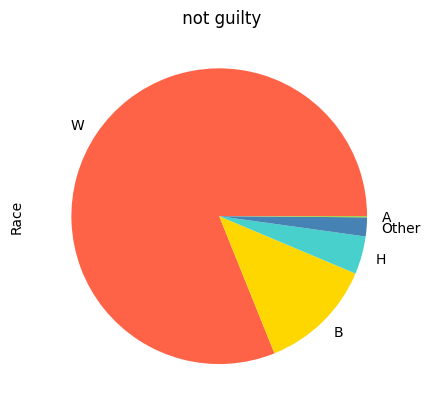

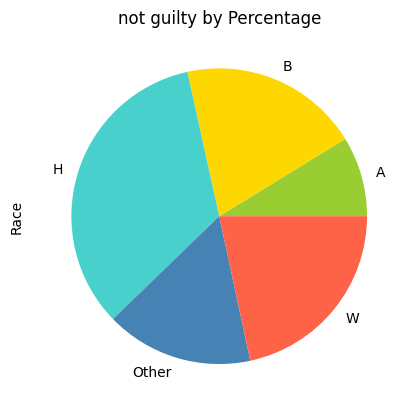

In [29]:
#guilty, not guilty and dismissed sentenced by race

from matplotlib import figure

df['Race'].value_counts()

dismissed = df.loc[df['Disp Desc'] == 'Dismissed']
dismissed['Race'] =  dismissed['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')

guilty = df.loc[df['Disp Desc'] == 'Guilty']
guilty['Race'] = guilty['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')

not_guilty = df.loc[df['Disp Desc'] == 'Not Guilty']
not_guilty['Race'] = not_guilty['Race'].replace(['U', 'I', 'EI', 'C'], 'Other')


rows = 3
columns = 3
colors1 = ['tomato', 'gold', 'steelblue','mediumturquoise','yellowgreen','mediumpurple']
(dismissed['Race'].value_counts()).plot.pie(y='Race', title="Dismissed",colors = colors1)
plt.show()

colors1 = ['yellowgreen', 'gold', 'tomato','steelblue','mediumturquoise','mediumpurple']
(dismissed['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="Dismissed by Percentage", colors = colors1)
plt.show()


colors1 = ['tomato', 'gold', 'mediumturquoise','steelblue','yellowgreen','mediumpurple']
(guilty['Race'].value_counts()).plot.pie(y='Race', title="guilty",colors = colors1) 
plt.show()


colors1 = ['yellowgreen', 'gold','mediumturquoise','steelblue','tomato','mediumpurple']
(guilty['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="guilty by Percentage", colors = colors1)
plt.show()

colors1 = ['tomato', 'gold','mediumturquoise','steelblue','yellowgreen','mediumpurple']
(not_guilty['Race'].value_counts()).plot.pie(y='Race', title=" not guilty",colors = colors1) 
plt.show()

colors1 = ['yellowgreen', 'gold','mediumturquoise','steelblue','tomato','mediumpurple']
(not_guilty['Race'].value_counts()/df['Race'].value_counts()).plot.pie(y='Race', title="not guilty by Percentage", colors = colors1)
plt.show()


W        12874
B         2786
Other      553
H          257
Name: Race, dtype: int64


<AxesSubplot: >

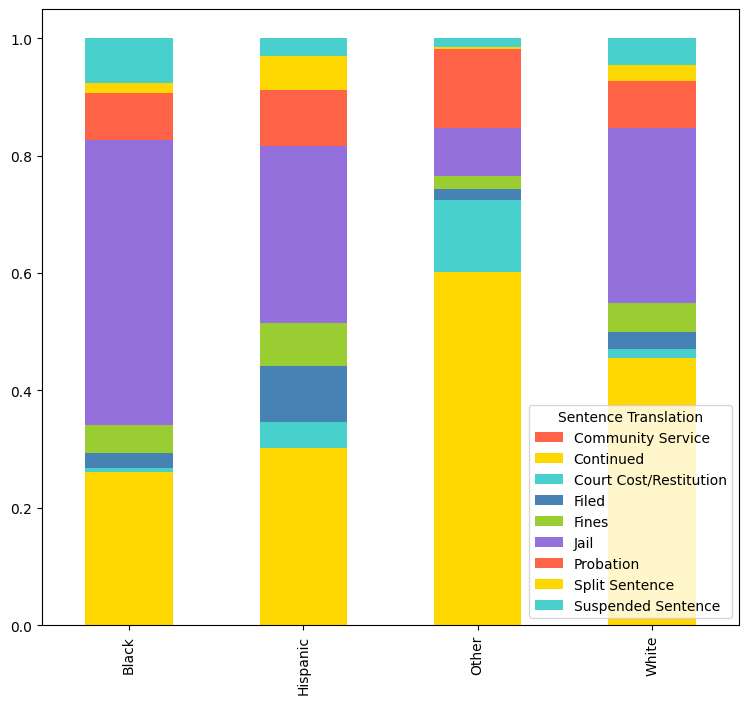

In [80]:
#Seperate dataframes by drug and larceny crimes

# print(df['Case Type'].value_counts())
drug_df = df.loc[df['Case Type'] == 'Narcotics']
gun_df = df.loc[df['Case Type'] == 'Larceny']
combined = pd.concat([drug_df, gun_df])
combined['Race'] =  combined['Race'].replace(['A'], 'Other')
print(combined['Race'].value_counts())
# print(drug_df)

combined['Race'].value_counts()
combined['Race'] = combined['Race'].replace(["Asian, Other"], 'Other')
grouped2 = combined.groupby(['Race','Sentence Translation']).size().unstack()
grouped2 = grouped2.div(grouped2.sum(axis=1), axis=0)

# grouped2.index = ['Black', 'Hispanic', 'Other', 'White']

colors1 = ['tomato', 'gold','mediumturquoise','steelblue','yellowgreen','mediumpurple']
grouped2.index = ['Black', 'Hispanic', 'Other', 'White']
grouped2.plot(kind = "bar", stacked = True, color = colors1, figsize=(9, 8))









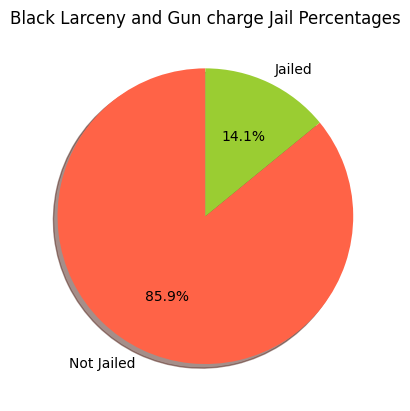

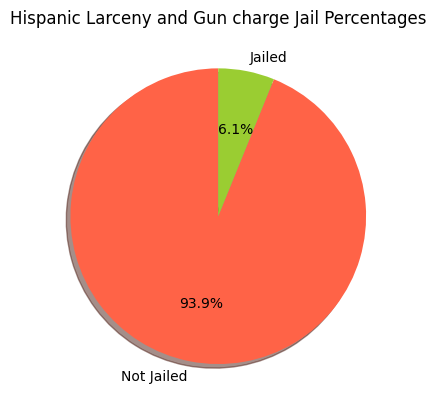

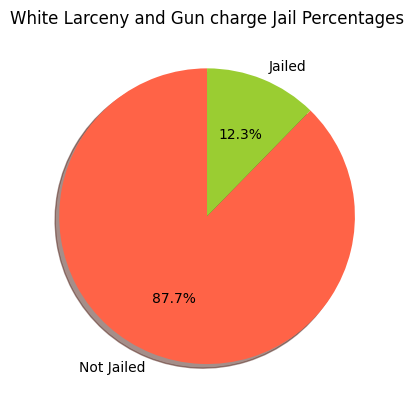

In [87]:

#Jail percentages of larceny and drug crimes

colors1 = ['tomato','yellowgreen', 'gold','mediumturquoise','steelblue','mediumpurple']
black_df = df.loc[df['Race'] == 'B']
final_df = black_df.loc[black_df['Sentence Translation'] == 'Jail']
num2 = final_df['Race'].value_counts().values[0]
num1 = black_df['Race'].value_counts().values[0]
graphing_points = [num1,num2]
fig1, ax1 = plt.subplots()
ax1.pie(graphing_points,  autopct='%1.1f%%', labels = ['Not Jailed', 'Jailed'],colors = colors1, shadow=True, startangle=90)
ax1.set_title('Black Larceny and Gun charge Jail Percentages')
plt.show()


hispanic_df = df.loc[df['Race'] == 'H']
final_df = hispanic_df.loc[hispanic_df['Sentence Translation'] == 'Jail']
num2 = final_df['Race'].value_counts().values[0]
num1 = hispanic_df['Race'].value_counts().values[0]
graphing_points = [num1,num2]
fig1, ax1 = plt.subplots()
ax1.pie(graphing_points,  autopct='%1.1f%%', labels = ['Not Jailed', 'Jailed'],colors = colors1, shadow=True, startangle=90)
ax1.set_title('Hispanic Larceny and Gun charge Jail Percentages')
plt.show()


white_df = df.loc[df['Race'] == 'W']
final_df = white_df.loc[white_df['Sentence Translation'] == 'Jail']
num2 = final_df['Race'].value_counts().values[0]
num1 = white_df['Race'].value_counts().values[0]
graphing_points = [num1,num2]
fig1, ax1 = plt.subplots()
ax1.pie(graphing_points,  autopct='%1.1f%%', labels = ['Not Jailed', 'Jailed'],colors = colors1, shadow=True, startangle=90)
ax1.set_title('White Larceny and Gun charge Jail Percentages')
plt.show()

